### Import Libs

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np

### Create Individual

In [7]:
def create_individual():
    # TODO: create a random chromosome
    return random.sample(range(8), 8)

### Generate Population

In [48]:
def generate_population(population_size:int = 100):
    population = []

    for _ in range(population_size):
        new_individual = create_individual()
        population.append(new_individual)

    return population

### Parent Selection

In [49]:
def parent_selection(population):
    #TODO: choose the pairs of parents
    parents = []
    fitness_scores, _ = population_fitnesss(population)
    sorted_population = sorted(fitness_scores, key=lambda item: item[1])
    for i in range(len(population)//2):
        parents.append(sorted_population[i][0])
    return parents

### Next Generation Selection

In [50]:
def next_generation_selection(children_population):
    #TODO: choose the next_generation
    return children_population

### Crossover

In [51]:
def crossover(parents):
    offsprings = []
    #TODO: implement you crossover algorithm
    while len(offsprings) < len(parents) * 2:
        parent1, parent2 = random.sample(parents, 2)
        point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        offsprings.extend([child1, child2])
    return offsprings

### Mutation

In [52]:
def mutate(seq):
    #TODO: implement mutate
    for x in range(len(seq)):
      if random.random() > 0.1:
        continue
      i, j = random.sample(range(8), 2)
      z=list(seq[x])
      z[i], z[j] = z[j], z[i]
      seq[x] = tuple(z)
    return seq

### Score Function

In [53]:
def fitness_score(seq):
    fit_score = 0
    #TODO: calculate fitness score
    for i in range(len(seq)):
        for j in range(i + 1, len(seq)):
            if seq[i] == seq[j] or abs(seq[i] - seq[j]) == j - i:
                fit_score += 1
    return fit_score

## Calculate Population Fitness

In [54]:
def population_fitnesss(population):
    population_fitness1 = 0
    individuals_fitnesses = []
    try:
      for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        population_fitness1 += fitness_sc
        individuals_fitnesses.append((tuple(chromosome), fitness_sc))
      return individuals_fitnesses, population_fitness1
    except:
      for chromosome in population:
        fitness_sc = fitness_score(chromosome[0])
        population_fitness1 += fitness_sc
        individuals_fitnesses.append((tuple(chromosome[0]), fitness_sc))
      return individuals_fitnesses, population_fitness1

### Termination Condition

In [55]:
def check_end(population) -> bool:
    #TODO: check end of algorithm
    fitness_scores, _ = population_fitnesss(population)
    if 0 in fitness_scores[:][1]:
        return True
    return False

### Run Your Algorithms

In [66]:
# The genetic algorithm
generation = 0
solution_is_found = False
fitness = []

population = generate_population(100)
population , population_fitness = population_fitnesss(population)

while not check_end(population):
    # TODO: this is a default setup which you maybe need to change.
    population = parent_selection(population)
    population = crossover(population)
    population = mutate(population)
    individuals_fitnesses , population_fitness = population_fitnesss(population)
    population = next_generation_selection(population)
    # print(individuals_fitnesses)
    generation += 1
    avg_fit = population_fitness / population.__len__()
    fitness.append(avg_fit)


### See Your Progress Over Generations

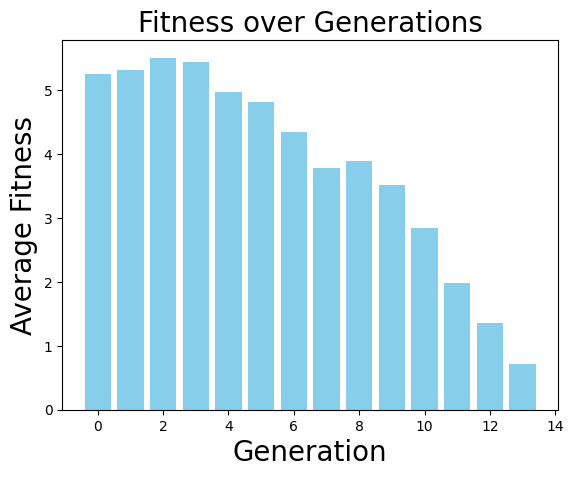

In [67]:
plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()